# Time Window Comparison
For the same time series

In [2]:
# make relevant imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# import backcasting tools
import backcaster as bc
import backcastingvis as vs

# set plot style options
mpl.rc('text', usetex = True)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.style.use('fivethirtyeight')

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [3]:
# pick country and time window candidates
country = 'Italy'
time_windows = [8, 10, 13]

# Import data only for Italy

raw_data = pd.read_csv('owid-covid-data.csv', parse_dates=['date']).sort_index()
data = raw_data[raw_data['location']==country]
data.set_index('date', inplace=True)

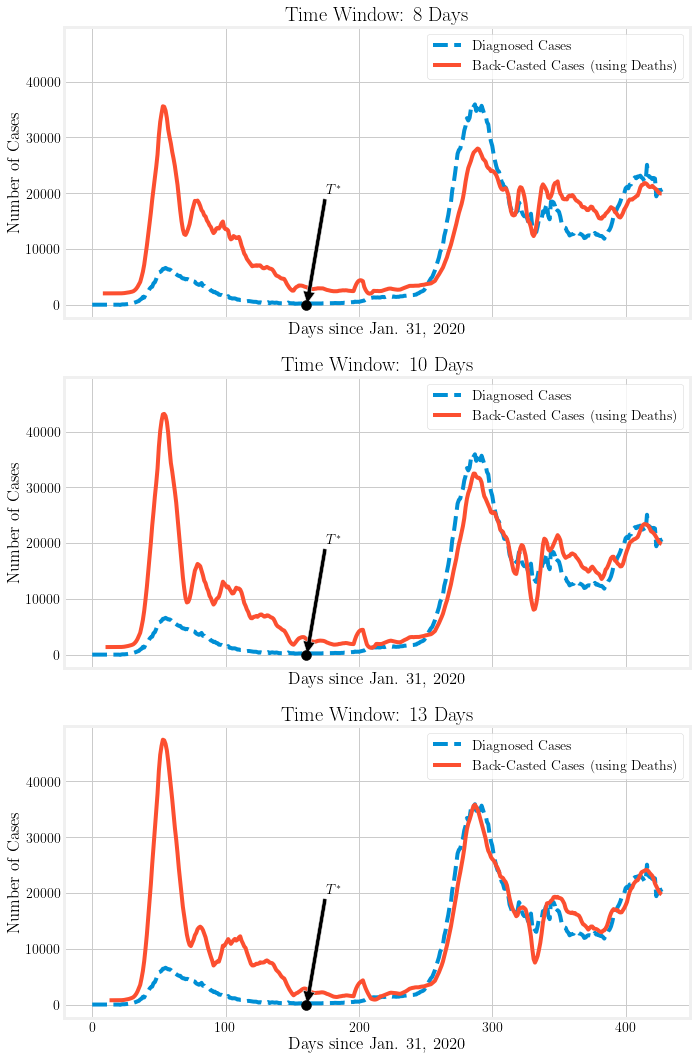

In [4]:
# three different plots

fig, ax = plt.subplots(3, 1, figsize=(10, 17), sharey=True, sharex=True)

for item in ax:
    item.set_xlabel('Days since Jan. 31, 2020')
    item.set_ylabel('Number of Cases')

# for each time window, perform backcasting analysis
for i, time_window in enumerate(time_windows):
    # load data
    deaths = data['new_deaths_smoothed'].fillna(0).to_numpy()
    cases = data['new_cases_smoothed'].fillna(0).to_numpy()
    
    ax[i].scatter([160], [0.01], s=100, color='black', zorder=4)
    ax[i].annotate(r'$T^*$', xytext=(175, 20000), xy=(161,0.03),arrowprops = dict(facecolor ='black',
                                  shrink = 0.01))
    
    # backcast
    CRC_cases, CRC_errors, CRC_cum_error = bc.generate_CRC(cases, deaths)
    loc_pred = bc.BackCaster(deaths[1:], CRC_cases, t_star=160, window=time_window)
    loc_pred.fit_gp()
    
    # plot
    win = loc_pred.window
    offset = win+len(loc_pred.pred)
    ax[i].plot(CRC_cases, '--', label='Diagnosed Cases')
    ax[i].plot(np.arange(win, offset),loc_pred.pred, label='Back-Casted Cases (using Deaths)')
    ax[i].set_title(r'Time Window: {} Days'.format(time_window))
    ax[i].legend()

fig.patch.set_facecolor('white')
#fig.suptitle('Time Window Comparison for Italy \n $T^*=160$', fontsize=30)
#fig.savefig('Time_Window_Comparison_Italy', bbox_inches='tight',pad_inches=0.1);
plt.show()

# Irrelevance of $T^*$

for the same time series, during a period where cases and deaths are both very low

In [5]:
# pick country and T* candidates
country = 'Italy'
t_stars = [140, 160, 190]

# Import data only for Italy

raw_data = pd.read_csv('owid-covid-data.csv', parse_dates=['date']).sort_index()
data = raw_data[raw_data['location']==country]
data.set_index('date', inplace=True)

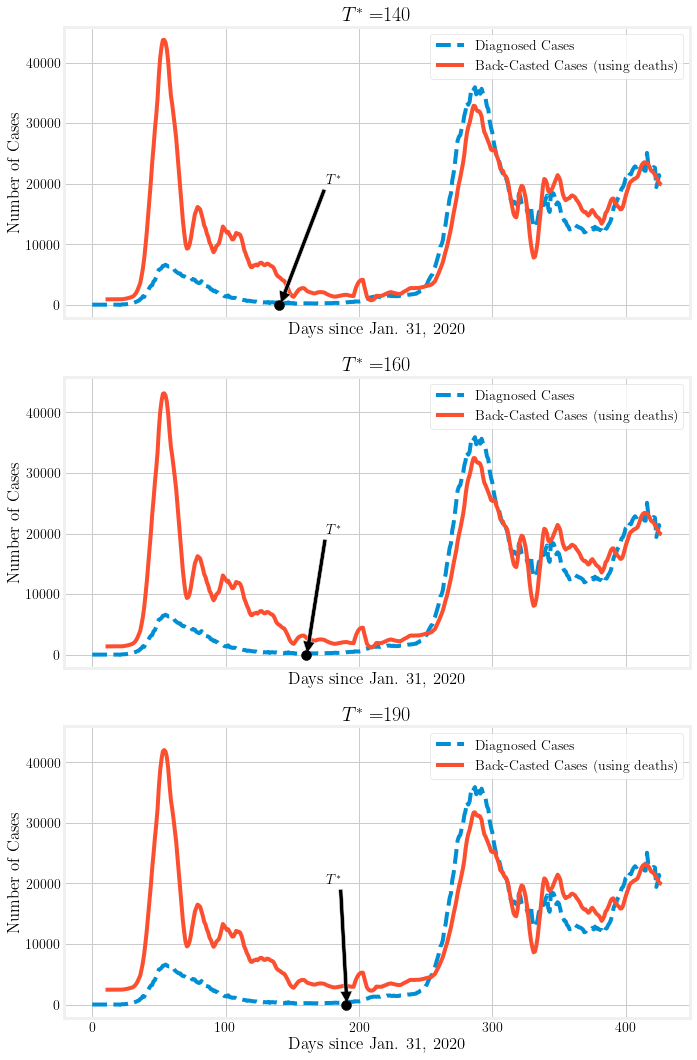

In [7]:
# three different plots

fig, ax = plt.subplots(3, 1, figsize=(10, 17), sharey=True, sharex=True)
time_window = 10
for item in ax:
    item.set_xlabel('Days since Jan. 31, 2020')
    item.set_ylabel('Number of Cases')

for i, t_star in enumerate(t_stars):
    deaths = data['new_deaths_smoothed'].fillna(0).to_numpy()
    cases = data['new_cases_smoothed'].fillna(0).to_numpy()
    
    ax[i].scatter([t_star], [0.01], s=100, color='black', zorder=4)
    ax[i].annotate(r'$T^*$', xytext=(175, 20000), xy=(t_star+1,0.03),arrowprops = dict(facecolor ='black',
                                  shrink = 0.01))
    
    CRC_cases, CRC_errors, CRC_cum_error = bc.generate_CRC(cases, deaths)
    loc_pred = bc.BackCaster(deaths[1:], CRC_cases, t_star=t_star, window=time_window)
    loc_pred.fit_gp()
    
    win = loc_pred.window
    offset = win+len(loc_pred.pred)
    ax[i].plot(CRC_cases, '--' ,label='Diagnosed Cases')
    ax[i].plot(np.arange(win, offset),loc_pred.pred, label='Back-Casted Cases (using deaths)')
    ax[i].set_title(r'$T^*=${}'.format(t_star))
    ax[i].legend()

fig.patch.set_facecolor('white')
#fig.suptitle('$T^*$ Comparison for Italy \n Time Window $= 10$', fontsize=30)
fig.savefig('T_star_Comparison_Italy', bbox_inches='tight',pad_inches=0.1);
plt.show()